At first will try to load template haskell. Then we will need our R.

In [1]:
:ext TemplateHaskell QuasiQuotes

Now we will add H.Prelude

In [2]:
initializeEmbeddedR defaultConfig

In order to use `H` in your notebook you need to use `H` quasiquote.
As you may have noticed `H` itself uses `r` quasiquote, but `r` is
is already widely used in `ihaskell` by `rlangqq`. And because there
is no sane way to hide packages, we decided to use `h`:

In [3]:
[h| 1 + 1|]

0x00007fe054a90798

Huh.. what does it mean? As was written in H manual (link), this an address of the result.
But what to do if you want to see value, not somethis strange? 
For this reason we have introduced the simplest quasi-quoter hDisp that just shows an output in readable form. It's not composable as it always have type IO (), so you can't use it as a part of other expression.

In [4]:
[hDisp| 1+1|]

[1] 2

Having plots in R is not so straightforward as it seems. In order to output plot
to the file one need to first set up plot device (one of `pdf`, `bmp`, `png` functions),
then once you've added all data use `dev.off()` in order to flush data.
This is required because you may want to add additional plots and data to the same one,
more over you can do it in a different cells.
This mean that you need to write smth like:

In [5]:
_ <- [h| png("Rplots/5-%03d.png");plot(c(1:10),mapply(sin,c(1:10))); dev.off()|]

Do not hope that **R** is smart enough to not rewrite your file, and add some sort of
suffix, even if we have "%03d" in filename, this is for pages only. As a result everything
looks quite scary to use and requite a lots of boilerplate. In order to automate this we
have introduced `hplot` quasiquter that hide all details in a background.
`hplot` do the following:
  1. initializes *png* device; 
  2. outputs plots to file "Rplots/auto-%i.png" where `i` is the highest index to be found there;
  3. flushes data with `dev.off()`;
  4. shows plot in the `notebook`.

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAABlBMVEUAAAD///+l2Z/dAAAHyklEQVR4nO3d4VajSAKAUXz/l96z9uyspjVCKLD4uPdHd88xlMZvSBUEdHkjbfntL4BjCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcT8GXv4442vhAD+VWx7+5mL2BF6YwYGBf9iWM+wM/GwOFngGewMftC2jCBw3KLA5eFYH7MEr12+cwkt0nMBxAm90taln74mOJ/Pttb4RKy1vF3tiu0907Nj2gpYPf16DwJvcL/BB285K4EHbTut2c/BB287rZqvoo7ZlFIHjBI4TOE7gOIHjBI4TOE7gOIHjBI4TOE7gOIHjBI4TOE7gOIHjBI4TOE7gOIHjBI4TOE7gOIHjBI4T+CCz3MMk8DGmuQtR4EPMcx+xwIcQOE7gOnNwnVU0pxA4TuA4geMEjhM4TuA4geMEjhM4TuA4geMEjhM4TuA4geMEjhM4TuA4geMEjhM4TuA4geMEjhM4TuA4geMEjjsr8Cw3293OSYGnuV32dnYGfg/3zd65PP5T4V+wP/Dy3eMEnoHAcecENgf/mr2B3+ffH+dgq+hf4zg4TuC4QYE/zbf/8+rXxED24DiB4/YGfvJqLPAMBpyq/O5xAs9A4DiB48zBcVbRcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncJzAcesCv3QzmcAzWBN4+TfzyKE5xYrAy+f/HDU0pzAHx5mD/1G9Yd0c/MfDXNRhDn63fPizxRz87t6BX/yZKlf6dt068LN7gHcMPRdzcDzwnVfR9whcZQ6Os4qOEzhO4DiB49asol/86bECz2DVKvqQoTmFwHHm4DiB41Ze0bHioVuH5hT24DiB4wSOEzjOmaw4JzriBI4zB8e58D3OrStxbj6LMwfHCRy3/t0k10Vf0qrAr92aJfAMBI4TOG7DYdLgoTmFVXScwHECxwkcJ3Dc3sBPruYReAYbAn+VcfnicSuH5hSb9uC/Hyzw7Ha+RAs8O3Nw3Oq3C52qvKa1bzYs3my4pkGBzcGzWvtu0oZer97qwhGcyYqzio7b+Ya/4+DZ7bxkR+DZCRy396I7c/DkXHQX5zApTuC41W82uDfpmtzZECdwnMBxDpPirKLjVgRePv/nqKE5xZo92I9RurANc7BF1hWZg+MEjlt3HPzSBXQCr3H0xYlr92DHwcd46Sz/1k+w8sNbEwv8s9fOEW7/DCs+vOnS6DVD8zZN4H+PkZzoGGySwIcMzX/NNAcPHpp3E6yi/VqdK7MHxwkc5w3/OJfsxAkc57rouNVnsrYfKQk8A6voOIHjHCbFWUXHCRznMCnOYVKcVXTclovuxg7NKRwmxa1dRW++plLgOQgcJ3Dc6uNgc/A1OUyKEzhuw2GSOfiKNrzZMHhoTrH+zYbRQ3MKL9FxXqLjvETHbXk/eOzQnMJxcJzAcQLHCRwncJzAcQLHzRbYLw4fbLLAL91CwRNzBd5z6psvCRwncNxcgc3Bw+0M/B5k5G8At4oebH/g5bvHKTUDgeMEjtsb+H3OHDgHM9hkq2hGEzhuUGBz8KzswXECx+0N/MUl06/+lhaOMOBU5XePE3gGAscJHHfAHLx6W05gFR0ncNyIwN88SOAZCBwncJzAcRZZcQLHCRwncJzAcQLHCRwncJzAcQLHCRwncFw+8N0v360HXt4m+UJ+Szzw8uHPexI4TuC4eGBzcD2wVfSuDx+2LaMIHCdwnMBxAscJHCdwnMBxAscJHCdwnMBxAscJHCdwnMBxAscJHCdwnMBxAscJHCdwnMA1j78i5YdH7/lMO7blVY+3cgjc8tfNWAK3CBwncJ05uM4q+l4EjhM4TuA4geMEvooXf9iIwBfxeHy7ZbvXP3zYtjz46wzVtg1f/fBh2/JA4DiB68zBdVbRfGVv4OWPl7blBDsDLw9/b9mWMwgcJ3CcOTjuqqvou/+c79UuGvjVw/77GRT45Dn45RN393PNPVjg1QSOOyDwsjxZWg9iDl7rmnuwVfRqe090PNlbFZjB7hMdO7blBALHXXUOZiWB40YE/uZBAs9A4DiB4wSOO3KRxQyOC/ya4Z9x9ICzj7dtQIEvN57A8fEEjo8ncHw8gePjCRwfb/bAnErgOIHjBI4TOE7gOIHjBI4TOO70wD++Q719xLGjjf76xg64bB3z7MDjbyobG2T41zd0wH/CbhnzN16iB38Dh/cYavD/MVcIPHgHHv7/y/wv0XMHHt13cODhA77dbA8e3nfqHvcLPP71b/xLoMA7HPD5Zu5xw8CD97g3x8FrNiBL4DiB4wSOEzhO4DiB4wSOEzhO4DiB4wSOEzhO4DiB4wSOEzhO4DiB4wSOu2Xgz1clfriOLfjdCD6lHy0fL0v8fD9X79vRe0ZPfIj5uAcLHPAp4vL3H+NvbZ1A7gk9sXz86+s9uPf9yD2hJwSOEzju7zn4//8SuODPKvrLRdanFXZJ7gmt8OQ5974dvWf0M4Hrvn3Swe9G8CnxkcBxAscJHCdwnMBxAscJHCdwnMBxAscJHCdwnMBxAscJHPcf1+R7AL/QSqwAAAAASUVORK5CYII=">
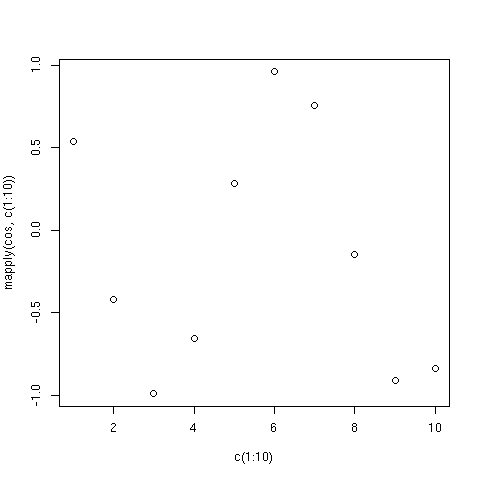

In [6]:
[hPlot| plot(c(1:10), mapply(cos,c(1:10)))|]

Do you think, this is all? More or less so.. however you need to know that Resource handing instance for `IO`,
is a bit cheaty, it justs protects all toplevel values forever, so not expect from R to return objects anytime
soon. For toplevel objects this is expected behaviour, but here we have the same behavior for all values
appear in quasiquotes, so `[h| sum(allocate10GbVector) |]` will not free 10Gb Vector anytime. And this is not
what you are expecting for research tool. However there is a solution, all you need is to use Regions, read
more on the topic in (link).

In [46]:
import H.Prelude.Interactive
import qualified Foreign.R.Type as R

In [47]:
runRegion $ fmap (fromSEXP . cast R.SReal) [h| 1 + 1|] :: IO Double

2.0